In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # feature for extraction of data in numerical data
from sklearn.linear_model import LogisticRegression # target variable with two classes
from sklearn.metrics import accuracy_score # performace of the model

import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\english\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\english\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
data = pd.read_csv(r"C:\Users\english\Desktop\data\mail_data.csv")
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
data.shape

(5572, 2)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [72]:

data.loc[data['Category'] == 'spam', 'Category',]= 0
data.loc[data['Category'] == 'ham', 'Category',]= 1

In [73]:
X = data['Message']

Y = data['Category']

print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [74]:
# Splitting of data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

# 80% data is trained and 20% data is tested.
# randam state for centroid and mean

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [75]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [76]:
## Transform the text data to feature vector to use for the logistic regression
feature_ext = TfidfVectorizer(min_df=1, stop_words='english', lowercase=1)

X_train_features = feature_ext.fit_transform(X_train)
X_test_features = feature_ext.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


c:\Users\english\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [77]:
print(X_test_features) # features accuracy

  (0, 7271)	0.1940327008179069
  (0, 6920)	0.20571591693537986
  (0, 5373)	0.2365698724638063
  (0, 5213)	0.1988547357502182
  (0, 4386)	0.18353336340308998
  (0, 1549)	0.2646498848307188
  (0, 1405)	0.3176863938914351
  (0, 1361)	0.25132445289897426
  (0, 1082)	0.2451068436245027
  (0, 1041)	0.28016206931555726
  (0, 405)	0.2381316303003606
  (0, 306)	0.23975986557206702
  (0, 20)	0.30668032384591537
  (0, 14)	0.26797874471323896
  (0, 9)	0.2852706805264544
  (0, 1)	0.2381316303003606
  (1, 7368)	0.29957800964520975
  (1, 6732)	0.42473488678029325
  (1, 6588)	0.3298937975962767
  (1, 6507)	0.26731535902873493
  (1, 6214)	0.3621564482127515
  (1, 4729)	0.22965776503163893
  (1, 4418)	0.3457696891316818
  (1, 3491)	0.496093956101028
  (2, 7205)	0.22341717215670331
  :	:
  (1110, 3167)	0.5718357066163949
  (1111, 7353)	0.4991205841293424
  (1111, 6787)	0.40050175714278885
  (1111, 6033)	0.4714849709283488
  (1111, 3227)	0.44384935772735523
  (1111, 2440)	0.4137350055985486
  (1112, 7071)

In [78]:
## Model training in Logistic Regresssion

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [79]:
prediction_on_training = model.predict(X_train_features)
accuracy_on_training = accuracy_score(Y_train, prediction_on_training)
print("Accuracy of the training data:", accuracy_on_training)

Accuracy of the training data: 0.9670181736594121


In [80]:
## Model testing in Logistic Regresssion

prediction_on_test = model.predict(X_test_features)
accuracy_on_test = accuracy_score(Y_test, prediction_on_test)
print("Accuracy of the testing data:", accuracy_on_test)

Accuracy of the testing data: 0.9659192825112107


In [81]:
## predict a system

input_mail =["WINNER!! As a valued network customer you have been selected to receivea ??900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

input_data_feature = feature_ext.transform(input_mail)

prediction = model.predict(input_data_feature)

print(prediction)

if(prediction[0]==1):
    print('Ham mail')

else:
    print('Spam mail')

[0]
Spam mail


In [82]:
## predict a system

input_mail =["Is that seriously how you spell his name?"]

input_data_feature = feature_ext.transform(input_mail)

prediction = model.predict(input_data_feature)

print(prediction)

if(prediction[0]==1):
    print('Ham mail')

else:
    print('Spam mail')

[1]
Ham mail


### Data Visualization

In [86]:
 # Rename the columns name
data.rename(columns = {'Category': 'target', 'Message': 'text'}, inplace = True)
data.head(3)

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [90]:
# convert the data variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [91]:
#checking missing values

data.isnull().sum()

target    0
text      0
dtype: int64

In [92]:
#check duplicate values

data.duplicated().sum()

415

In [93]:
#remove Duplicate 
data = data.drop_duplicates(keep = 'first')

In [94]:
data.shape

(5157, 2)

Percentage of spam and not spam mail.

In [95]:
values = data['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 12.429707194105099
percentage of 1 : 87.5702928058949


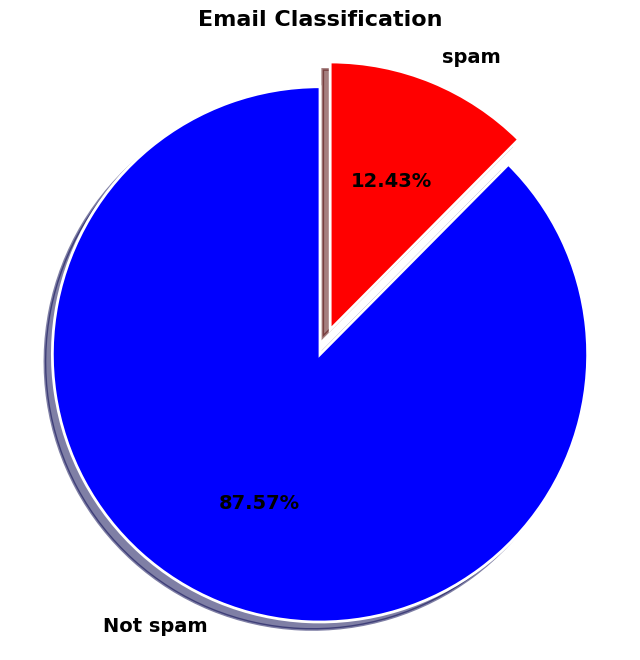

In [98]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['blue', 'red']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['Not spam', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
# Show the pie chart
plt.show()

### Statistical analysis

In [100]:
data['num_characters'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sentence'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
#Summary statistics for not spam messages
data[data['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [102]:
# summary statistis for spam messages
data[data['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


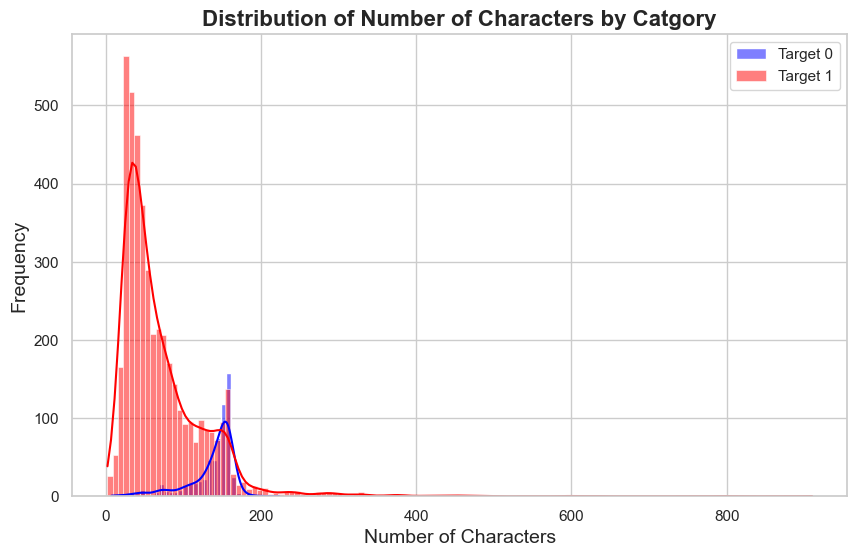

In [106]:

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(data[data['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(data[data['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Catgory', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

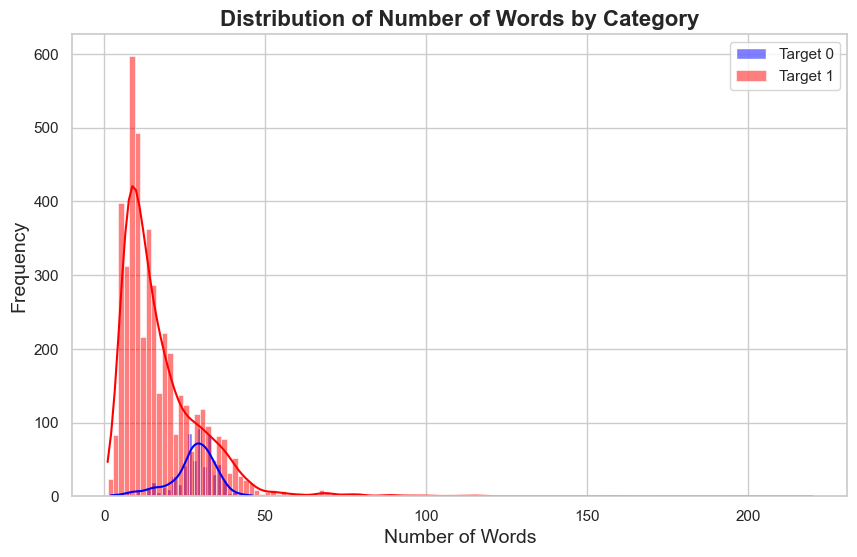

In [107]:

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(data[data['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(data[data['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Category', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

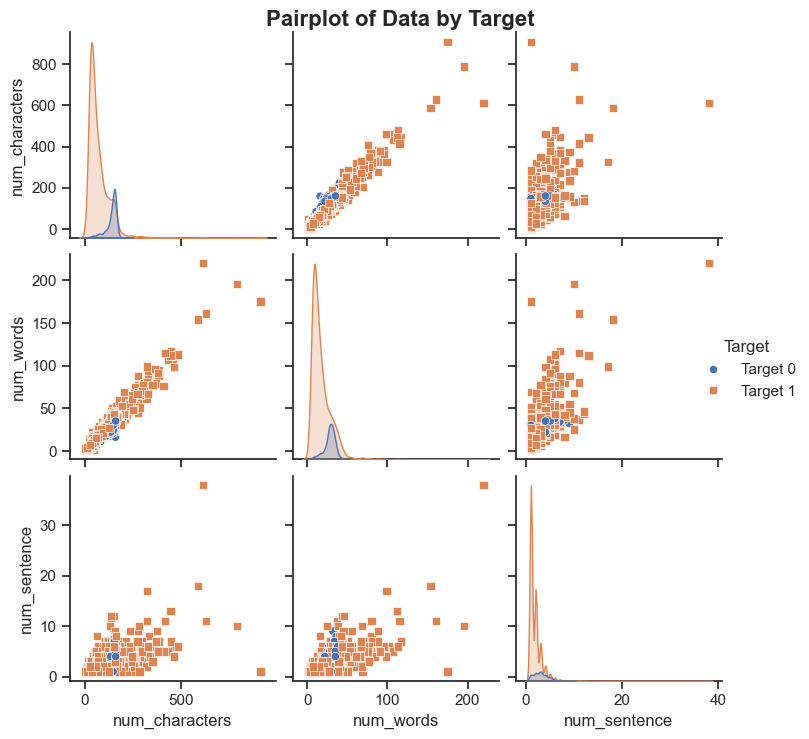

In [109]:
# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(data, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

### Correlation Visualization throught heatmap

In [110]:


data[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,-0.374409,-0.255968,-0.259023
num_characters,-0.374409,1.000000,0.966155,0.622428
num_words,-0.255968,0.966155,1.000000,0.679396
num_sentence,-0.259023,0.622428,0.679396,1.000000


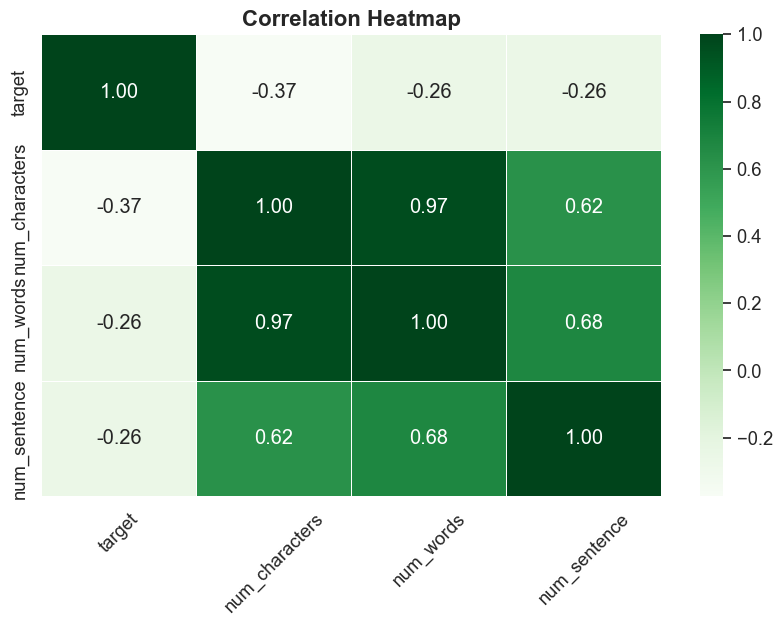

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = data[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()